In [2]:
import xarray as xr

In [3]:
sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']
sst

<xarray.DataArray 'sst' (time: 1828, lat: 90, lon: 180)>
[29613600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [4]:
sst.groupby("lat")

DataArrayGroupBy, grouped over 'lat'
90 groups with labels -89.0, -87.0, ..., 87.0, 89.0.

In [5]:
dc = dict(sst.groupby("lat"))
dc.keys()

dict_keys([-89.0, -87.0, -85.0, -83.0, -81.0, -79.0, -77.0, -75.0, -73.0, -71.0, -69.0, -67.0, -65.0, -63.0, -61.0, -59.0, -57.0, -55.0, -53.0, -51.0, -49.0, -47.0, -45.0, -43.0, -41.0, -39.0, -37.0, -35.0, -33.0, -31.0, -29.0, -27.0, -25.0, -23.0, -21.0, -19.0, -17.0, -15.0, -13.0, -11.0, -9.0, -7.0, -5.0, -3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0, 23.0, 25.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.0, 41.0, 43.0, 45.0, 47.0, 49.0, 51.0, 53.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 73.0, 75.0, 77.0, 79.0, 81.0, 83.0, 85.0, 87.0, 89.0])

In [6]:
dc.values()

dict_values([<xarray.DataArray 'sst' (time: 1828, lon: 180)>
[329040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    lat      float64 -89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean, <xarray.DataArray 'sst' (time: 1828, lon: 180)>
[329040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    lat      float64 -87.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean, <xarray.DataArray 'sst' (time: 1828, lon: 180)>
[329040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 18

In [12]:
gb = sst.groupby("time.month")

In [15]:
dict(gb).keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [6]:
sstmm = sst.groupby("time.month").mean()
sstmm.coords

Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
sstdm = sst.groupby("time.day").mean()
sstdm

<xarray.DataArray 'sst' (day: 3, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-251.35    ,   -1.8     ,   -1.8     , ...,   -1.8     ,
           -1.8     ,   -1.8     ],
        [  -1.8     ,   -1.8     ,   -1.8     , ..., -251.34999 ,
           -1.8     ,   -1.8     ],
        [-500.90002 , -500.90002 , -500.90002 , ..., -500.90002 ,
         -500.90002 , -500.90002 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-245.92493 ,  -48.816654,  -45.199924, ...,  -57.85831 ,
          -54.241642,  -54.241642],
        [ -52.433308,  -50.624977,  -50.624977, ..., -247.73328 ,
          -54.241642,  -50.624977],
        [-528.0244  , -528.0244  , -528.0244  , ..., -529.8327  ,
         -529.8327  , -529.8328  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-199.63458 , -126.05059 , -122.06127 , ..., -185.00616 ,
         -234.79935 , -273.511   ],
        [-178.36073 , -178.80394 , -209.39041 , ..., -169.20027 ,
         -181.90755 , -210.12996 ],
        [-435.30084 , -463.96246 , -462.7804  , ..., -467.50854 ,
         -466.32666 , -431.45908 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * day      (day) int64 14 15 16
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [8]:
sst.groupby("time.season").mean()

<xarray.DataArray 'sst' (season: 4, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-106.41506 ,  -45.389584,  -85.70994 , ...,  -57.9216  ,
         -115.13296 ,  -49.748528],
        [-126.5752  ,  -68.81893 ,  -66.63949 , ..., -133.6585  ,
         -129.84439 , -124.94058 ],
        [-533.0483  , -531.4139  , -529.23444 , ..., -537.9522  ,
         -535.7727  , -530.32404 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-223.0161  , -161.44649 , -163.62593 , ..., -362.5025  ,
         -360.86783 , -409.9067  ],
        [-313.46384 , -314.5536  , -254.07378 , ..., -203.94649 ,
         -260.06735 , -310.73947 ],
        [-556.4776  , -548.3046  , -545.03546 , ..., -554.29816 ,
         -554.29816 , -552.1187  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-367.3639  , -190.59764 , -130.94681 , ..., -194.97867 ,
         -372.29037 , -430.29938 ],
        [-194.98016 , -254.08376 , -374.48212 , ..., -316.47217 ,
         -256.2733  , -315.37747 ],
        [-444.5324  , -562.7415  , -563.2888  , ..., -563.2888  ,
         -563.2888  , -442.89066 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [10]:
sst.groupby("time.season").std() # std

<xarray.DataArray 'sst' (season: 4, lat: 90, lon: 180)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [206.46713, 190.9033 , 197.9637 , ..., 215.59273, 223.55026,
         193.4033 ],
        [236.25511, 237.82341, 230.89392, ..., 252.29482, 245.82295,
         237.97005],
        [175.84088, 170.24344, 168.21193, ..., 176.03568, 174.15361,
         171.23119]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [244.06715, 259.0563 , 257.17224, ..., 340.99106, 342.5125 ,
         377.86963],
        [293.0584 , 293.28918, 266.14655, ..., 244.17255, 271.33154,
         292.46298],
        [178.86311, 187.47057, 183.88263, ..., 189.83344, 189.11581,
         186.82892]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [285.64725, 216.11565, 142.10825, ..., 219.79567, 285.27682,
         371.1242 ],
        [326.74332, 430.48492, 284.81497, ..., 221.71494, 256.7846 ,
         327.0032 ],
        [389.3    , 303.16684, 302.8291 , ..., 302.8291 , 302.8291 ,
         389.93512]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [13]:
# get anomaly

sstmm = sst.groupby("time.month").mean()
(sst - sstmm).shape # 对吗？

(1828, 90, 180, 12)

In [12]:
sstmm.coords,sstmm.shape

(Coordinates:
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12,
 (12, 90, 180))

In [14]:
ssta = sst.groupby("time.month") -sstmm
ssta

<xarray.DataArray 'sst' (time: 1828, lat: 90, lon: 180)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  45.669262 ,   44.03821  ,  161.47363  , ...,   55.45553  ,
           53.82449  ,   50.562397 ],
        [  71.76599  ,   79.92123  ,   78.29018  , ...,   75.02808  ,
           70.13494  ,   68.5039   ],
        [  45.668762 ,   45.66864  ,   44.037598 , ...,   50.561768 ,
           48.930786 ,   44.037598 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [ 156.58025  ,  399.60605  ,  -96.2319   , ...,  177.78378  ,
          179.41487  ,  600.22437  ],
        [ -68.50418  , -316.4231   , -565.973    , ..., -233.23962  ,
          -57.087067 ,  -68.50418  ],
        [-185.9397   , -445.27606  , -455.06232  , ..., -433.8587   ,
         -433.85876  , -437.12085  ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-283.802    , -464.84808  , -707.8739   , ...,   88.07599  ,
           81.5517   ,  572.49646  ],
        [-569.2351   , -574.1283   , -750.2811   , ..., -740.4949   ,
         -742.12585  , -572.49725  ],
        [-192.46387  ,   52.1929   ,   50.56186  , ..., -440.383    ,
         -438.7519   ,   53.823944 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3 4

In [20]:
# choose data in specific months

sst.time.dt.month

<xarray.DataArray 'month' (time: 1828)>
array([1, 2, 3, ..., 2, 3, 4])
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00

In [21]:
label = (sst.time.dt.month == 1)
label

<xarray.DataArray 'month' (time: 1828)>
array([ True, False, False, ..., False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00

In [22]:
sst[label]

<xarray.DataArray 'sst' (time: 153, lat: 90, lon: 180)>
[2478600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-01-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [24]:
sst.groupby("time.month")[1]

<xarray.DataArray 'sst' (time: 153, lat: 90, lon: 180)>
[2478600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-01-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [29]:
label = sst.time.dt.month.isin([1,2,3])
label

# label1 = sst.time.dt.month == 1
# label2 = sst.time.dt.month == 2
# labelall = label1 | label2 # &
sst[label]


<xarray.DataArray 'sst' (time: 459, lat: 90, lon: 180)>
[7435800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-03-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [35]:
sst[label]

<xarray.DataArray 'sst' (time: 459, lat: 90, lon: 180)>
[7435800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-03-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [30]:
con1 = sst.time.dt.month.isin([2,3,4])
con2 = sst.time.dt.year.isin([1900,1902])
cona = con2 & con1 # \ or
sst[cona]

<xarray.DataArray 'sst' (time: 6, lat: 90, lon: 180)>
[97200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1900-02-15 1900-03-16T12:00:00 ... 1902-04-16
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

## plot plus

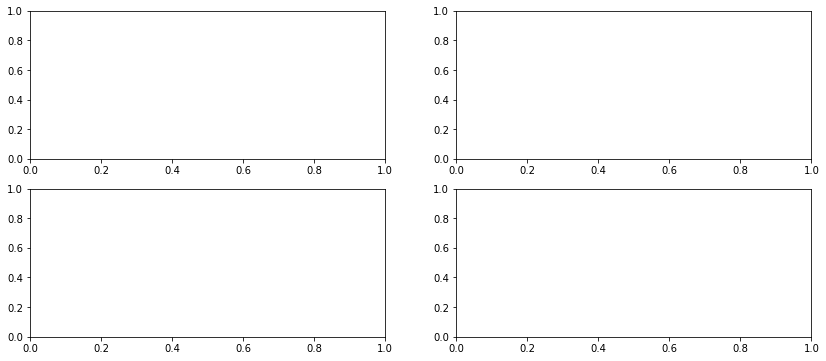

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [34]:
sstsm = sst.groupby("time.season").mean()
sstsm

<xarray.DataArray 'sst' (season: 4, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-106.41506 ,  -45.389584,  -85.70994 , ...,  -57.9216  ,
         -115.13296 ,  -49.748528],
        [-126.5752  ,  -68.81893 ,  -66.63949 , ..., -133.6585  ,
         -129.84439 , -124.94058 ],
        [-533.0483  , -531.4139  , -529.23444 , ..., -537.9522  ,
         -535.7727  , -530.32404 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-223.0161  , -161.44649 , -163.62593 , ..., -362.5025  ,
         -360.86783 , -409.9067  ],
        [-313.46384 , -314.5536  , -254.07378 , ..., -203.94649 ,
         -260.06735 , -310.73947 ],
        [-556.4776  , -548.3046  , -545.03546 , ..., -554.29816 ,
         -554.29816 , -552.1187  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-367.3639  , -190.59764 , -130.94681 , ..., -194.97867 ,
         -372.29037 , -430.29938 ],
        [-194.98016 , -254.08376 , -374.48212 , ..., -316.47217 ,
         -256.2733  , -315.37747 ],
        [-444.5324  , -562.7415  , -563.2888  , ..., -563.2888  ,
         -563.2888  , -442.89066 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [35]:
sstdjf = sstsm.loc['DJF']
sstjja = sstsm.loc['JJA']
sstson = sstsm.loc["SON"]
sstmam = sstsm.loc['MAM']

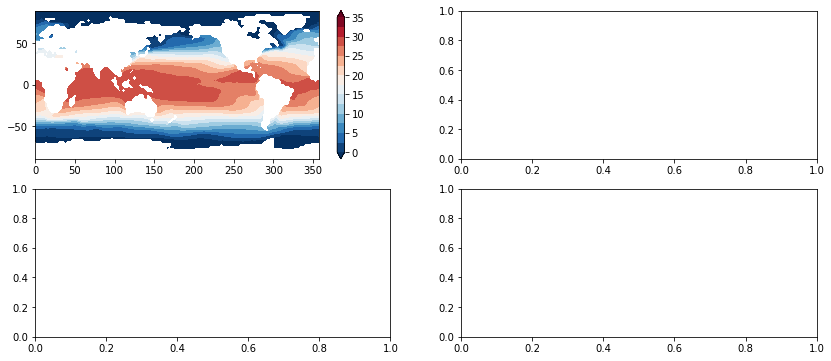

In [36]:
import numpy as np
x = sst.lon
y = sst.lat
fig = plt.figure(figsize=(14,6))
# =====================================
ax1 = fig.add_subplot(2,2,1)
m = ax1.contourf(x,y,sstmam,levels=np.linspace(0,35,15),cmap="RdBu_r",extend="both")
plt.colorbar(m)

# 补全剩下四张图
ax2 = fig.add_subplot(2,2,2)

ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

## 作业

计算12个月的气候态平均海温并在一个fig上使用循环画出。